In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns

In [44]:
df=pd.read_csv('/workspaces/Daily-machineLearning/InsuranceCostPrediction/Dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
df.shape

(1338, 7)

In [46]:
df[['region','charges']].groupby('region').describe()

charges                                                      \
            count          mean           std        min          25%   
region                                                                  
northeast   324.0  13406.384516  11255.803066  1694.7964  5194.322288   
northwest   325.0  12417.575374  11072.276928  1621.3402  4719.736550   
southeast   364.0  14735.411438  13971.098589  1121.8739  4440.886200   
southwest   325.0  12346.937377  11557.179101  1241.5650  4751.070000   

                                                  
                    50%         75%          max  
region                                            
northeast  10057.652025  16687.3641  58571.07448  
northwest   8965.795750  14711.7438  60021.39897  
southeast   9294.131950  19526.2869  63770.42801  
southwest   8798.593000  13462.5200  52590.82939

In [47]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [48]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64


In [49]:
df[['smoker','charges']].groupby('smoker').describe()

charges                                                        \
         count          mean           std         min           25%   
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                                                
                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801

In [50]:
nosm=df[df.smoker=='no']
sm=df[df.smoker=='yes']

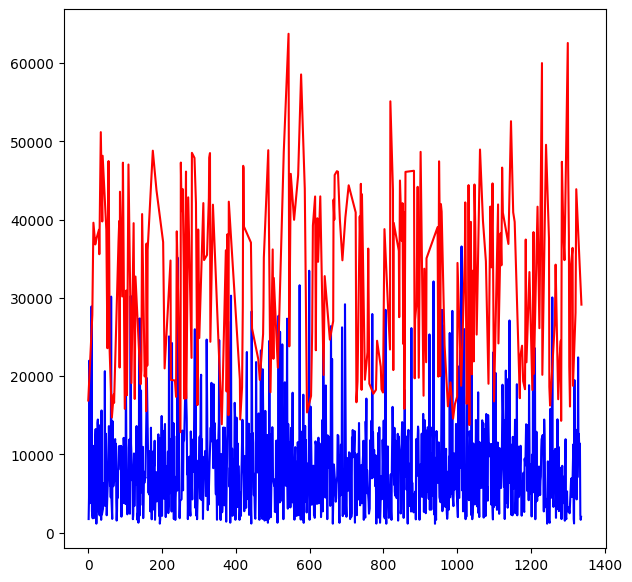

In [51]:
plt.figure(figsize=(7,7))
plt.plot(nosm['charges'],color='blue')
plt.plot(sm['charges'],color='red')

<Axes: xlabel='region', ylabel='count'>

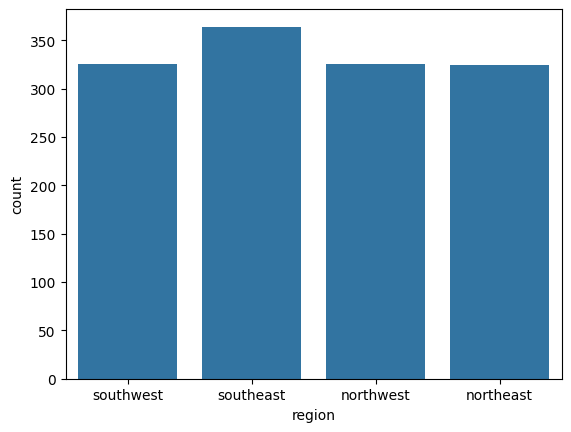

In [52]:
sns.countplot(x='region',data=df)

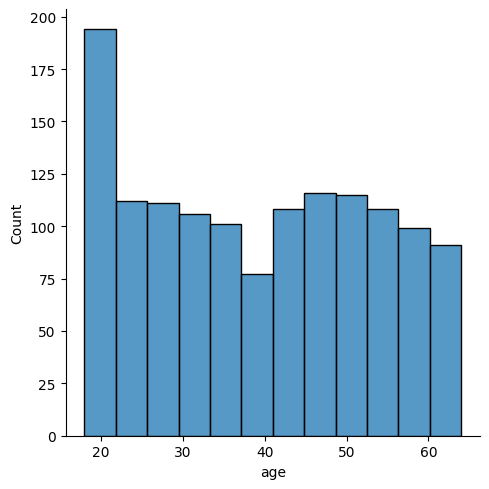

In [53]:
sns.displot(x='age',data=df,kind='hist')

<Axes: xlabel='smoker', ylabel='count'>

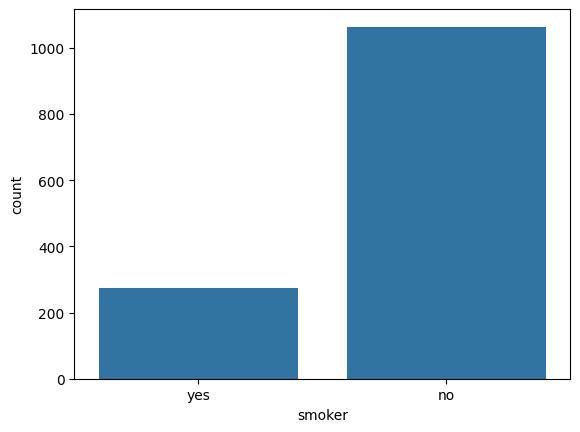

In [54]:
sns.countplot(x='smoker',data=df)

<Axes: xlabel='sex', ylabel='count'>

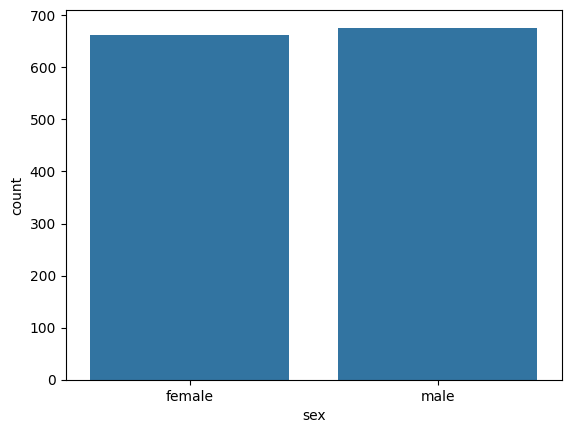

In [55]:
sns.countplot(x='sex',data=df)

In [56]:
df.replace({'sex':{"male":0,"female":1}},inplace=True)

/tmp/ipykernel_21423/2031042698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{"male":0,"female":1}},inplace=True)


In [57]:
df['smoker']=df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [58]:
df['region']=df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


In [60]:
features=df.drop(columns=['charges'],axis=1)
target=df['charges']

In [61]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=20)

In [62]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [63]:
y_pred=model.predict(x_test)
print('r2 score:',r2_score(y_pred,y_test))

r2 score: 0.7281901468920324
